In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.Size([100, 180, 4])
torch.Size([100, 3])
tensor([147.4416,  93.7161, 157.0012], device='cuda:0')


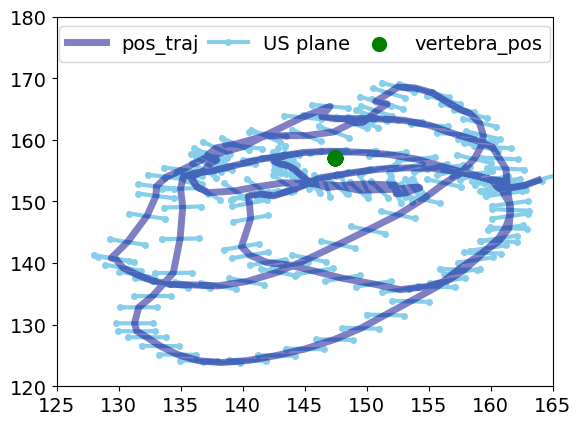

In [25]:
plt.rcParams.update({
    "font.size": 14,          # Base font size
    "axes.titlesize": 16,     # Title size
    "axes.labelsize": 14,     # X/Y label size
    "xtick.labelsize": 14,    # Tick label size
    "ytick.labelsize": 14,
    "legend.fontsize": 12,    # Legend text size
    "figure.titlesize": 18    # Figure title (if used)
})


cmd_pose_trajs = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_reconstruction/PPO/cmd_pose_trajs.pt')
# (N, T, 3)
print(cmd_pose_trajs.shape)
huamn_to_ver_pose = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_reconstruction/PPO/human_to_ver.pt')
print(huamn_to_ver_pose.shape)
print(huamn_to_ver_pose[0, :])

cmd_pose_trajs = cmd_pose_trajs.cpu().numpy()
huamn_to_ver_pose = huamn_to_ver_pose.cpu().numpy()

skip = 1
length = 1.5
for traj in range(1): # cmd_pose_trajs.shape[0]
    plt.plot(cmd_pose_trajs[traj, :, 0], cmd_pose_trajs[traj, :, 1], c='darkblue', 
             linewidth=5, alpha=0.5, label='pos_traj' if traj == 0 else "")

    for t in range(cmd_pose_trajs.shape[1]):
        if t % skip != 0:
            continue

        x_pos = cmd_pose_trajs[traj, t, 0]
        y_pos = cmd_pose_trajs[traj, t, 1]
        z_angle = cmd_pose_trajs[traj, t, 2]
        # Compute perpendicular angle
        perp_angle = z_angle

        # Line segment endpoints (centered at (x, y))
        dx = length * np.cos(perp_angle)
        dy = length * np.sin(perp_angle)

        x0, x1 = x_pos - dx, x_pos + dx
        y0, y1 = y_pos - dy, y_pos + dy

        if t==0:
            plt.plot([x0, x1], [y0, y1], color='skyblue', linewidth=3.0, 
                     alpha=1.0, zorder=0, marker='o', markersize=4.0, label='US plane')
        else:
            plt.plot([x0, x1], [y0, y1], color='skyblue', linewidth=3.0, 
                     alpha=1.0, zorder=0, marker='o', markersize=4.0)

plt.ylim(120, 180)
plt.xlim(125, 165)
plt.scatter(huamn_to_ver_pose[:, 0], huamn_to_ver_pose[:, 2], c='green', s=100, label='vertebra_pos', zorder=2)
plt.legend(ncol=3, loc='upper center', columnspacing=0.5, fontsize=14)
plt.show()

torch.Size([64, 600, 4])
torch.Size([64, 3])
tensor([147.4416,  93.7161, 157.0012], device='cuda:0')


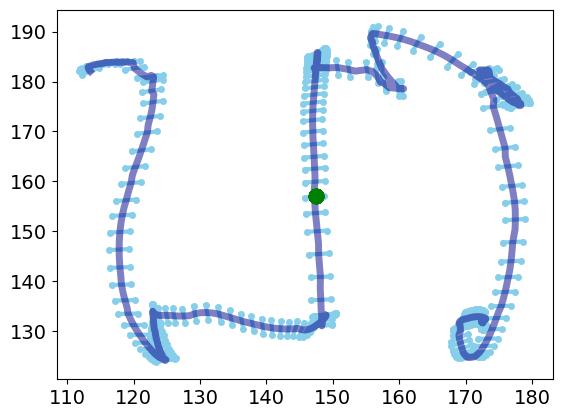

In [26]:
cmd_pose_trajs = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_reconstruction/Heuristic/cmd_pose_trajs.pt')
# (N, T, 3)
print(cmd_pose_trajs.shape)
huamn_to_ver_pose = torch.load('/home/yunkao/git/IsaacLabExtensionTemplate/source/spinal_surgery/spinal_surgery/recordings/robot_US_reconstruction/Heuristic/human_to_ver.pt')
print(huamn_to_ver_pose.shape)
print(huamn_to_ver_pose[0, :])

cmd_pose_trajs = cmd_pose_trajs.cpu().numpy()
huamn_to_ver_pose = huamn_to_ver_pose.cpu().numpy()

skip = 2
length = 1.5
start_t = 50
cmd_pose_trajs = cmd_pose_trajs[:, start_t:, :]
for traj in range(1): # cmd_pose_trajs.shape[0]
    plt.plot(cmd_pose_trajs[traj, :, 0], cmd_pose_trajs[traj, :, 1], c='darkblue', 
             linewidth=5, alpha=0.5, label='pos_traj' if traj == 0 else "")

    for t in range(cmd_pose_trajs.shape[1]):
        if t % skip != 0:
            continue

        x_pos = cmd_pose_trajs[traj, t, 0]
        y_pos = cmd_pose_trajs[traj, t, 1]
        z_angle = cmd_pose_trajs[traj, t, 2]
        # Compute perpendicular angle
        perp_angle = z_angle

        # Line segment endpoints (centered at (x, y))
        dx = length * np.cos(perp_angle)
        dy = length * np.sin(perp_angle)

        x0, x1 = x_pos - dx, x_pos + dx
        y0, y1 = y_pos - dy, y_pos + dy

        if t==0:
            plt.plot([x0, x1], [y0, y1], color='skyblue', linewidth=3.0, 
                     alpha=1.0, zorder=0, marker='o', markersize=4.0, label='US plane')
        else:
            plt.plot([x0, x1], [y0, y1], color='skyblue', linewidth=3.0, 
                     alpha=1.0, zorder=0, marker='o', markersize=4.0)


plt.scatter(huamn_to_ver_pose[:, 0], huamn_to_ver_pose[:, 2], c='green', s=100, label='vertebra_pos', zorder=2)
# plt.legend()
plt.show()